<a href="https://colab.research.google.com/github/quinbez/Image-Generation/blob/main/Text_to_Image_Generation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation
!pip install openai diffusers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.5/362.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [2]:
# Import
from openai import OpenAI
import torch
from diffusers import Transformer2DModel, PixArtSigmaPipeline
import os
from datetime import datetime
from PIL import Image


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# Insert Open AI GPT4 API
# api_key = ""

def get_completion(messages,
                   model='gpt-4o',
                   temp = 0,
                   ):
    """Generates a completion for the given messages and model.

    Args:
      messages: A list of messages, where each message is a dictionary with the
        following keys:
          * role: The role of the sender of the message, e.g. "user" or "system".
          * content: The text of the message.
      model: The model to use to generate the completion.
      temperature: The temperature of the model. Higher temperatures result in
        more creative and unpredictable completions.
      max_tokens: The maximum number of tokens to generate.

    Returns:
      A string containing the generated completion.
    """
    client = OpenAI(api_key=api_key)
    response = None
    while response is None:
        try:
            response = client.chat.completions.create(model=model,
            messages=messages, temperature=temp)
        except Exception as e:
            return None
    return response.choices[0].message.content

In [4]:
# Initialize and configure PixArtSigmaPipeline for Image Generation
torch.cuda.empty_cache()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weight_dtype = torch.float16

pipe = PixArtSigmaPipeline.from_pretrained(
    "PixArt-alpha/PixArt-Sigma-XL-2-1024-MS",
    torch_dtype=weight_dtype,
    use_safetensors=True,
)
pipe.to(device)

# User's Post (Input)
user_text = "It was a breathtaking evening at the grand castle. The towering spires and ornate architecture cast an enchanting silhouette against the starry night sky. Inside the grand ballroom, crystal chandeliers hung overhead, their light reflecting off the polished marble floors. Elegantly dressed guests glided across the dance floor, their formal gowns and tuxedos swaying in time with the live orchestra's captivating waltz. In a quiet corner, a young couple stood gazing out a large arched window, admiring the twinkling cityscape below. The woman wore a shimmering emerald dress, while the man was impeccably dressed in a charcoal gray suit. Soft candlelight flickered, casting a warm, romantic glow throughout the magnificent space."

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/9.06G [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
prompt4 = f"""
Extract key elements from the following text, including:
- Main characters or entities (people, animals, organizations)
- Core activities or events (what is happening)
- Notable details (descriptive elements, specific objects, important traits)

Using these elements, generate a concise visual prompt that captures the essence of the text and can be used to create an image representation.

<user post>
{user_text}
</user post>

make the prompt short as possible without any losing  any information.

Output the prompt in this format:
<prompt>:
"""

In [7]:
prompt4
messages=[

            {"role": "user", "content": prompt4},
        ]

response4 = get_completion(messages=messages)


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/20 [00:00<?, ?it/s]

<prompt>: A breathtaking evening at a grand castle with towering spires and ornate architecture silhouetted against a starry night sky. Inside the grand ballroom, crystal chandeliers reflect light off polished marble floors. Elegantly dressed guests in formal gowns and tuxedos dance to a live orchestra's waltz. In a quiet corner, a young couple gazes out a large arched window at the twinkling cityscape below. The woman wears a shimmering emerald dress, and the man is in a charcoal gray suit. Soft candlelight casts a warm, romantic glow throughout the space.


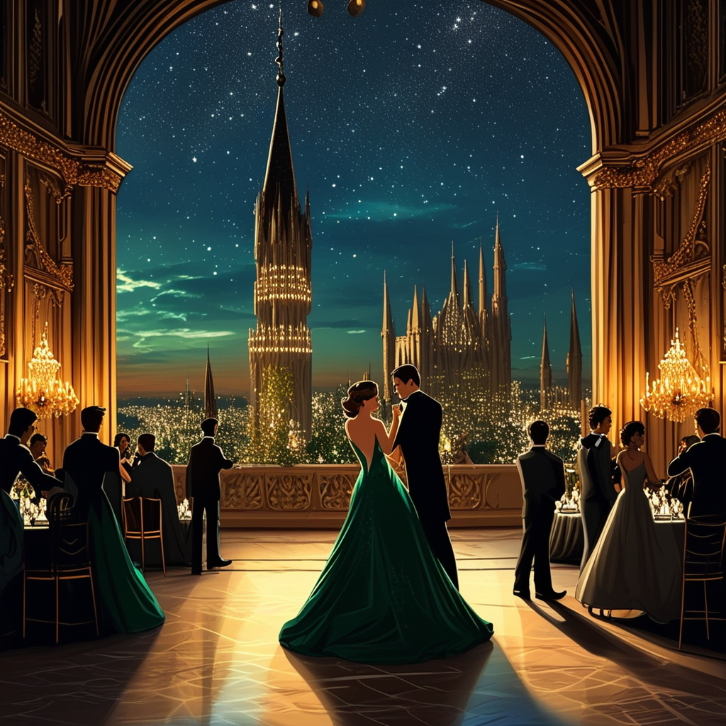

In [8]:
image = pipe(response4, height=726, width=726).images[0]
print(response4)
image

In [10]:
# Create a directory for prompts if it doesn't exist
prompt_folder = "./prompts"
os.makedirs(prompt_folder, exist_ok=True)

# Function to save a prompt
def save_prompt_to_file(prompt, folder):
    # Generate a unique filename using the current timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(folder, f"{timestamp}.txt")

    # Save the prompt to the file
    with open(filename, 'w') as f:
        f.write(prompt)

    print(f"Prompt saved to {filename}")

save_prompt_to_file(response4, prompt_folder)

Prompt saved to ./prompts/20240820_201640.txt


In [11]:
# Create a directory for generated images if it doesn't exist
image_folder = "./generated_images"
os.makedirs(image_folder, exist_ok=True)

# Function to save an image
def save_image(image, folder):
    # Generate a unique filename using the current timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(folder, f"{timestamp}.png")

    # Save the image to the file
    image.save(filename)
    print(f"Image saved to {filename}")

# Save the image
save_image(image, image_folder)

Image saved to ./generated_images/20240820_201645.png
